In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')



In [32]:
# Load the CSV file and preview the basic information
health_stroke_df = pd.read_csv('C:\\Users\\choim\\DS_py\\15\\healthcare-dataset-stroke-data.csv')

# Summarising how many entries are missing
health_stroke_df = health_stroke_df.replace({'smoking_status': 'Unknown'}, 'N/A')
total_entries = len(health_stroke_df)

# Treat 'N/A' as missing values
health_stroke_df['smoking_status'] = health_stroke_df['smoking_status'].replace('N/A', pd.NA)

bmi_number_of_missing = health_stroke_df.bmi.isnull().sum()
smoke_number_of_missing = health_stroke_df.smoking_status.isnull().sum()

# Print the missing value info
print(f"Missing entries details: ")
print(f"bmi has {bmi_number_of_missing} missing values.")
print(f"smoking_status has {smoke_number_of_missing} missing values.")

Missing entries details: 
bmi has 201 missing values.
smoking_status has 1544 missing values.


BMI 구간별 누락된 값의 개수:
bmi_bin
0-20     0
20-30    0
30-40    0
40-50    0
50-60    0
60+      0
Name: count, dtype: int64


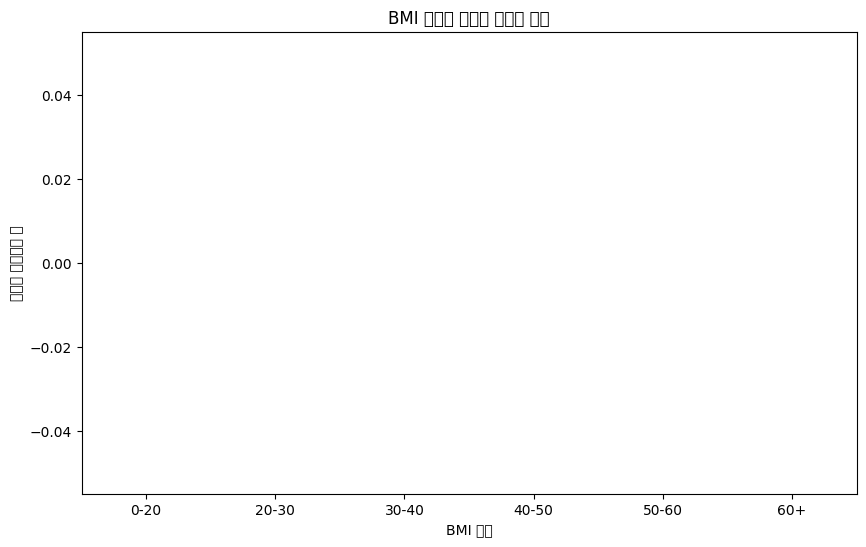

In [33]:
# BMI 데이터에 대한 범위 설정
bins = [0, 20, 30, 40, 50, 60, 100]
labels = ['0-20', '20-30', '30-40', '40-50', '50-60', '60+']
health_stroke_df['bmi_bin'] = pd.cut(health_stroke_df['bmi'], bins=bins, labels=labels, include_lowest=True)

# 각 범위별 누락된 BMI 값의 개수 계산
missing_bmi_counts = health_stroke_df['bmi_bin'][health_stroke_df['bmi'].isnull()].value_counts().sort_index()

# 결과 출력
print("BMI 구간별 누락된 값의 개수:")
print(missing_bmi_counts)

# 결과를 그래프로 표현
plt.figure(figsize=(10, 6))
missing_bmi_counts.plot(kind='bar', color='orange')
plt.title('BMI 구간별 누락된 데이터 분포')
plt.xlabel('BMI 구간')
plt.ylabel('누락된 데이터의 수')
plt.xticks(rotation=0)  # X축 레이블 회전
plt.show()